# Project 2 : Spam Detection

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sms = pd.read_csv('messages.csv',encoding='latin-1')
sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
sms.drop(columns=['subject'],axis=1,inplace=True)

In [4]:
sms.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [5]:
sms.shape

(2893, 2)

In [6]:
sms.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

In [9]:
print ('spam ratio = ', round(len(sms[sms['label']==1]) / len(sms.label),2)*100,'%')
print ('Not Spam ratio  = ', round(len(sms[sms['label']==0]) / len(sms.label),2)*100,'%')

spam ratio =  17.0 %
Not Spam ratio  =  83.0 %


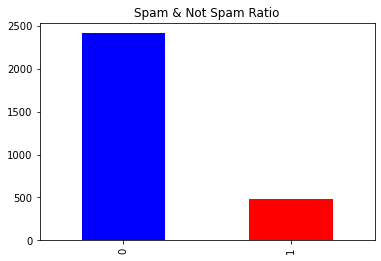

In [10]:
count_Class=pd.value_counts(sms["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["blue","red"])
plt.title('Spam & Not Spam Ratio')
plt.show();

In [11]:
sms['length'] = sms.message.str.len()

In [12]:
sms.head()

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [13]:
sms['message'] = sms['message'].str.lower()

In [14]:
sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
sms['message'] = sms['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
sms['message'] = sms['message'].str.replace(r'£|\$', 'dollers')
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
sms['message'] = sms['message'].str.replace(r'\d+(\.\d+)?', 'numbr')
sms['message'] = sms['message'].str.replace(r'[^\w\d\s]', ' ')
sms['message'] = sms['message'].str.replace(r'\s+', ' ')
sms['message'] = sms['message'].str.replace(r'^\s+|\s+?$', '')

In [15]:
sms.head()

,message,label,length
0,content length numbr apple iss research center...,0,2856
1,lang classification grimes joseph e and barbar...,0,1800
2,i am posting this inquiry for sergei atamas sa...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [16]:
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure', '_', 'e', 'n', 'de'])

sms['message'] = sms['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [17]:
sms['clean_length'] = sms.message.str.len()
sms.head()

,message,label,length,clean_length
0,content length numbr apple iss research center...,0,2856,2041
1,lang classification grimes joseph barbara f gr...,0,1800,1452
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1062
3,colleague researching differing degrees risk p...,0,324,208
4,earlier morning phone friend mine living south...,0,1046,629


In [18]:
print ('Origian Length : ', sms.length.sum())
print ('Clean Length : ', sms.clean_length.sum())

Origian Length :  9344743
Clean Length :  6584782


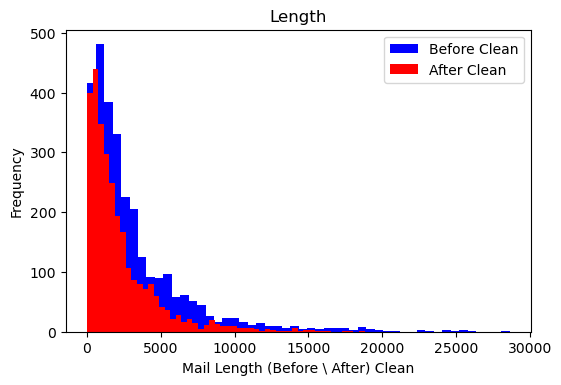

In [22]:
fig = plt.figure(dpi = 100)
ax = plt.axes()
sms['length'].plot(bins=50, kind='hist',ax=ax,color = 'blue', label='Before Clean')
sms['clean_length'].plot(bins=50, kind='hist',ax=ax,color = 'red', label='After Clean')
ax.set(xlabel = 'Mail Length (Before \ After) Clean',ylabel = 'Frequency',title = 'Length');
plt.legend()

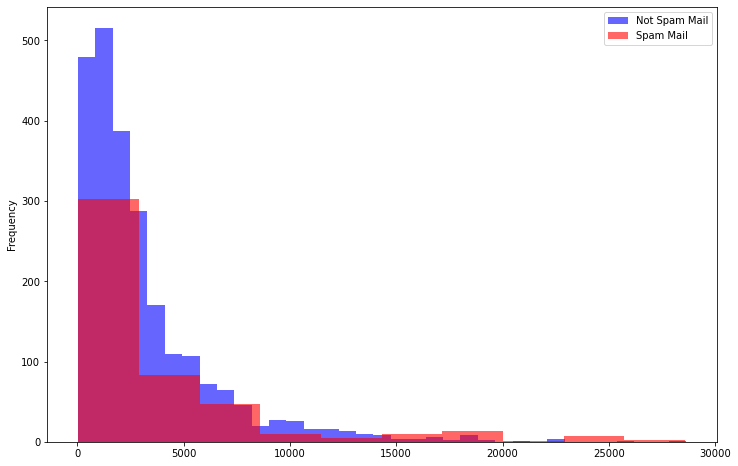

In [23]:
plt.figure(figsize=(12, 8))
sms[sms.label==0].length.plot(bins=35, kind='hist', color='blue', label='Not Spam Mail', alpha=0.6)
sms[sms.label==1].length.plot(kind='hist', color='red', label='Spam Mail', alpha=0.6)
plt.legend()

In [24]:
from collections import Counter
count1 = Counter(" ".join(sms[sms['label']==0]["message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(sms[sms['label']==1]["message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

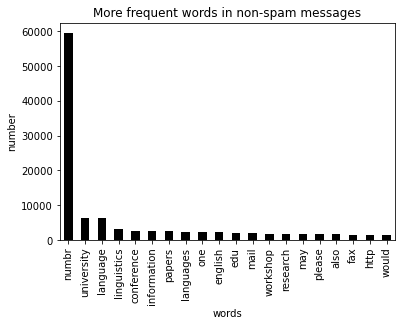

In [25]:
df1.plot.bar(legend = False,color="black")
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

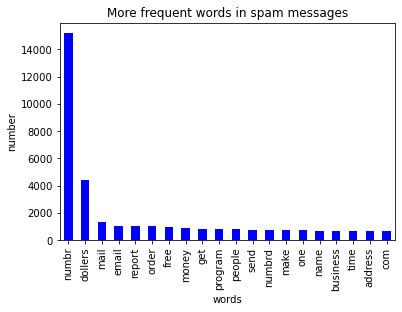

In [26]:
df2.plot.bar(legend = False, color = 'blue')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Most Frequent Words in Spam Mails

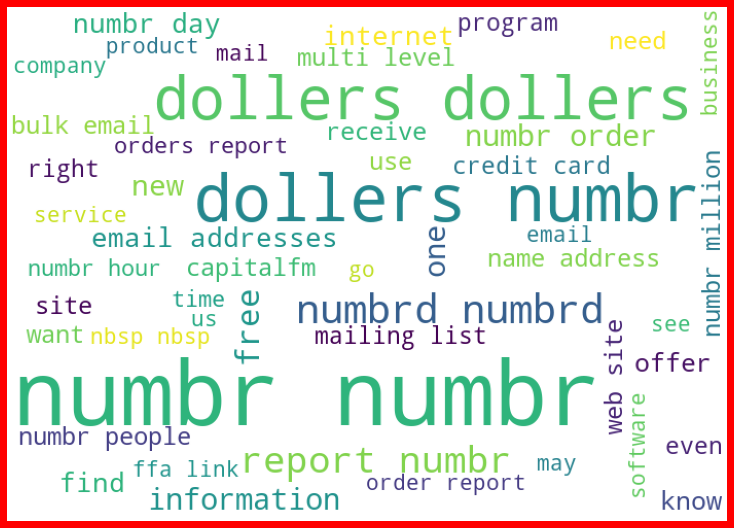

In [27]:
from wordcloud import WordCloud
spams = sms['message'][sms['label']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most Frequent Words in Not Spam Mails

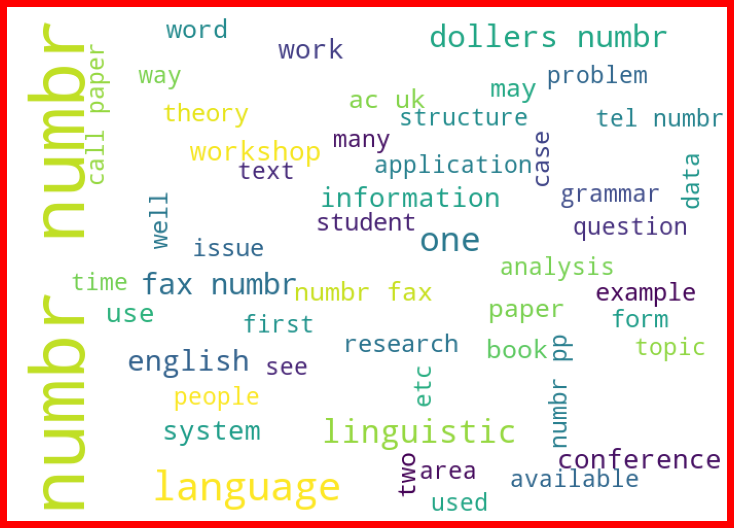

In [29]:
spams = sms['message'][sms['label']==0]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Text(0.5, 0.98, 'Avg. word length in individual mail')

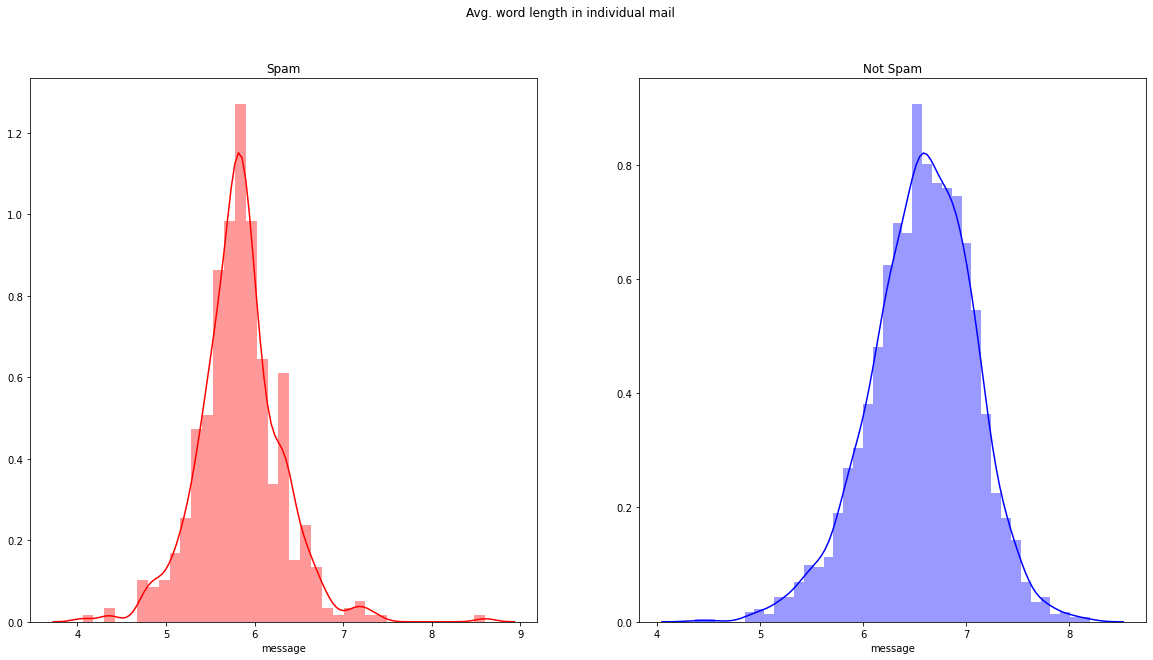

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=sms[sms['label']==0]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('Not Spam')
word=sms[sms['label']==1]['message'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Spam')
fig.suptitle('Avg. word length in individual mail')

In [39]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [34]:
vocab_size = 400
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 16

In [35]:
X = sms['message']
Y = sms['label']

In [36]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)

In [37]:
X = tokenizer.texts_to_sequences(X)

In [38]:
X = np.array(X)
y = np.array(Y)

In [40]:
X = pad_sequences(X, maxlen=max_length)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=7)

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 16)           6400      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 6,833
Trainable params: 6,833
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 20
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test,y_test), verbose=2)

Train on 2169 samples, validate on 724 samples
Epoch 1/20
2169/2169 - 3s - loss: 0.6136 - accuracy: 0.8266 - val_loss: 0.5251 - val_accuracy: 0.8218
Epoch 2/20
2169/2169 - 1s - loss: 0.4472 - accuracy: 0.8377 - val_loss: 0.4390 - val_accuracy: 0.8218
Epoch 3/20
2169/2169 - 1s - loss: 0.4015 - accuracy: 0.8377 - val_loss: 0.4127 - val_accuracy: 0.8218
Epoch 4/20
2169/2169 - 1s - loss: 0.3718 - accuracy: 0.8382 - val_loss: 0.3740 - val_accuracy: 0.8218
Epoch 5/20
2169/2169 - 1s - loss: 0.3239 - accuracy: 0.8474 - val_loss: 0.3090 - val_accuracy: 0.8453
Epoch 6/20
2169/2169 - 1s - loss: 0.2566 - accuracy: 0.8778 - val_loss: 0.2398 - val_accuracy: 0.8785
Epoch 7/20
2169/2169 - 1s - loss: 0.1935 - accuracy: 0.9147 - val_loss: 0.1803 - val_accuracy: 0.9102
Epoch 8/20
2169/2169 - 1s - loss: 0.1490 - accuracy: 0.9414 - val_loss: 0.1411 - val_accuracy: 0.9392
Epoch 9/20
2169/2169 - 1s - loss: 0.1208 - accuracy: 0.9525 - val_loss: 0.1156 - val_accuracy: 0.9655
Epoch 10/20
2169/2169 - 1s - loss: 

In [44]:
result = model.evaluate(X_test, y_test)
loss = result[0]
accuracy = result[1]
print(f"Accuracy Score : {accuracy*100:.2f}%")

724/724 [==============================] - 0s 178us/sample - loss: 0.0436 - accuracy: 0.9876
Accuracy Score : 98.76%


Verifying Prediction Model

In [47]:
from keras.preprocessing import sequence

In [61]:
def check_mail(mail):
    mail = tokenizer.texts_to_sequences(mail)
    mail = sequence.pad_sequences(mail, maxlen=max_length)
    preds = model.predict(mail)
    if(preds[0] > 0.4):
        print("This eMail is marked as Spam.")   
    else:
        print('This eMail is Not Spam.')

In [62]:
mail1 =["Win Free Lottery worth Million Dollors. Please Submit Your bank Details to Proceed Further."]

check_mail(mail1)

This eMail is marked as Spam.


In [63]:
mail2 = ["Hi My friend. i am sending you my some college documents. Can you help in converting all in pdf format."]
check_mail(mail2)

This eMail is Not Spam.
